# Stephen Stark 


In [1]:
import pandas as pd

# Boosting and Classification:

Data: The data we will use has been taken from here: https://archive.ics.uci.edu/ml/datasets/Adult (Links to an external site.)

There will be some basic preprocessing work to do, some of which is outlined. The goal is to take census data and predict whether an individual would have an income that exceeds $50k/yr. This is a binary classification problem.



## 1. Data Processing

### a) Import the data from the website directly: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data (Links to an external site.)

We can use pandas to read the data that is stored in csv format. Please note there is no header, so we will build column names in a later step. Also, we are going to remove leading white spaces (which just make things tough later)

In [2]:
adult_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                       header = None, 
                       skipinitialspace=True)

In [3]:
adult_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### b) There is no header included, but information on column names is here: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names (Links to an external site.)

Scroll to the bottom of that link to see the explanation of the columns. You need to build the column names for your dataframe. It is highly encouraged to not include spaces in column names. Finally, call your target variable (the last column of ">50K" or "<=50k") "salary".

An easy way to do this is to build a list of column names, and pass those into the .columns() attribute.

Example below:

* list_of_columns = ["column_a", "column_b", "column_c"]
* my_dataframe.columns = list_of_columns

Resource: https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas (Links to an external site.)

 (Links to an external site.)
 


In [4]:
cols = ['age','workclass','fnlwgt','education',
        'education-num','marital-status','occupation',
        'relationship','race','sex',
        'capital-gain','capital-loss','hours-per-week',
        'native-country','salary']
adult_df.columns = cols
adult_df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


 ### c) Check your dataframe shape to verify that you have the correct # of rows and columns. Run the following command:

* adult_df.shape
* You should get a shape of: (32561, 15)

In [5]:
adult_df.shape

(32561, 15)

### d) Drop the 3rd column from the data (it is referred to as "fnlwgt" on UCI's website and is not necessary for this project)



In [6]:
adult_df = adult_df.drop('fnlwgt', axis=1)
adult_df.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### e) Note: There are random values of  '?' that show up in the data - this is fine! These just refer to "unknown" and can be left as is. This data has no true NA values, so no need to check.



In [12]:
adult_df[adult_df.workclass=='?'].head(3)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K


In [13]:
adult_df.replace(to_replace='?',value="unknown", inplace=True)

### f) Use the .replace() method to make the following changes to the "salary" column:

"<=50K" should become 0 \
">50K" should become 1 \
Note: This step is essential to calculate the ROC_AUC score in model evaluation steps.

Resource: https://stackoverflow.com/questions/51672709/converting-no-and-yes-into-0-and-1-in-pandas-dataframe (Links to an external site.)



In [14]:
adult_df.replace(to_replace=['<=50K', '>50K'], value=[0, 1], inplace=True)
adult_df.salary

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

### g) Create your X dataframe (just your predictors). It should include every feature except for the target variable which is "salary".

You should have the following shape: (32561, 13)



In [15]:
y = adult_df['salary']
X = adult_df.drop(['salary'], axis=1)
X.shape


(32561, 13)

### h) Create your y dataframe (just your target variable). It should only be "salary".

You should have the following shape: (32561, )

The values should only be 0 and 1.



In [16]:
y.shape

(32561,)

In [17]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: salary, dtype: int64

### i) For this homework we will try converting columns with factors to separate columns (i.e. one-hot encoding). It is not necessary for trees, but can be a very powerful tool to use. There are a variety of ways to do this, but we can use Pandas built-in method .get_dummies(). Pandas will automatically split out columns that are categorical. For now, just run across your full X dataframe.

* X_encoded = pd.get_dummies(X)

Your updated X dataframe should have the following shape: (32561, 107)

In [18]:
X_encoded = pd.get_dummies(X)
X_encoded.shape

(32561, 107)

### j) Split data into train / test set using an 70/30 split. Verify that you have the same number of columns in your X_train and X_test.

In [19]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.3,random_state = 123)

In [20]:
print(X_train.shape)
print(X_test.shape)

(22792, 107)
(9769, 107)


## 2. Random Forest Classifier - Base Model:

Start by creating a simple Random Forest only using default parameters - this will let us compare Boosting methods to Random Forest in binary classification problems.

### a) Use the RandomForestClassifier in sklearn. Fit your model on the training data.



In [21]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### b) Use the fitted model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.



In [22]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

y_pred_test=rfc.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

Accuracy: 0.8493192752584706


In [23]:
#vector of predictions
print(y_pred_test)

[0 0 0 ... 1 0 0]


In [24]:
#vector of predicted probabilitiesin array format
print(rfc.predict_proba(X_test)[:,1])

[0.18 0.09 0.   ... 0.74 0.04 0.4 ]


### c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).



In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# import the metrics class
from sklearn import metrics

In [26]:
#predict values on test data.  Print the confusion matrix
y_pred_rfc = rfc.predict(X_test)
cnf_matrix = confusion_matrix (y_test, y_pred_rfc)
print(cnf_matrix)

[[6829  579]
 [ 893 1468]]


Text(69.0, 0.5, 'Actual')

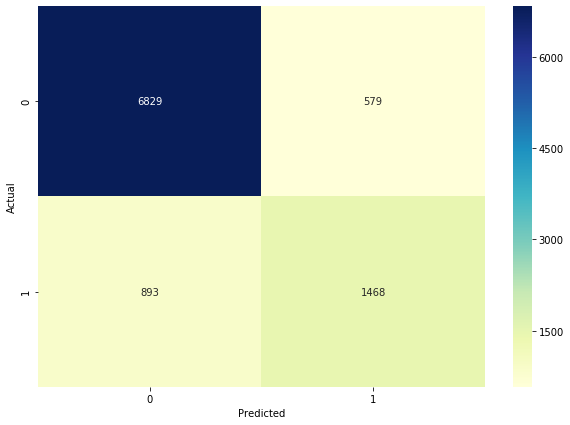

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [28]:
#Classification Report
print(classification_report(y_test, y_pred_rfc))
confusion_matrix(y_test, y_pred_rfc)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7408
           1       0.72      0.62      0.67      2361

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.85      9769



array([[6829,  579],
       [ 893, 1468]])

### d) Calculate the AUC score

In [29]:
from sklearn.metrics import roc_auc_score

y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
rfc_roc_auc = roc_auc_score(y_test, y_pred_proba_rfc)

# Print roc_auc_score
print('ROC AUC score RFC: {:.2f}'.format(rfc_roc_auc))

ROC AUC score RFC: 0.89


### e) Identify the top 5 features. Feel free to print a list OR to make a plot.



In [30]:
#Feature importance sorted descending order
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_[:5]), X_encoded.columns), 
             reverse=True))

Features sorted by their score:
[(0.2272, 'age'), (0.1136, 'hours-per-week'), (0.1041, 'capital-gain'), (0.0694, 'education-num'), (0.0324, 'capital-loss')]


### f) Using the model from part B, predict for the train data. Look at the classification report for the train data - is there overfitting for the RandomForest model happening?



In [31]:
#predict values on test data.  Print the confusion matrix
y_pred_rfc_train = rfc.predict(X_train)
cnf_matrix_train = confusion_matrix (y_train, y_pred_rfc_train)
print(cnf_matrix_train)

[[17159   153]
 [  290  5190]]


Text(69.0, 0.5, 'Actual')

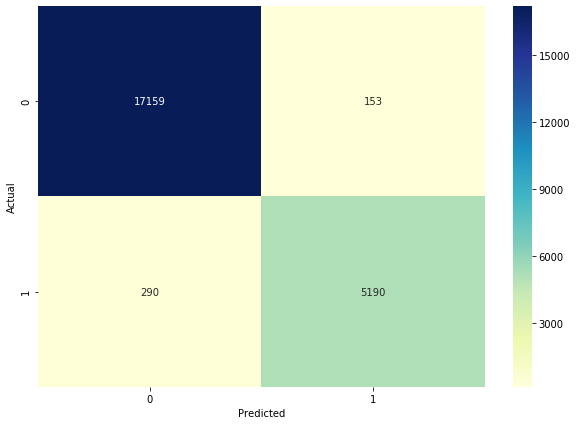

In [32]:
plt.figure(figsize = (10,7))
sns.heatmap(cnf_matrix_train, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [33]:
#Classification Report
print(classification_report(y_train, y_pred_rfc_train))
confusion_matrix(y_train, y_pred_rfc_train)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     17312
           1       0.97      0.95      0.96      5480

    accuracy                           0.98     22792
   macro avg       0.98      0.97      0.97     22792
weighted avg       0.98      0.98      0.98     22792



array([[17159,   153],
       [  290,  5190]])

Yes, there appears to be some overfitting in our model.  Based on the accuracy score of the train set vs the test set.  The model appears to predict the train set with a high accuracy rate (approx. 97%) and only predicts the test set at 84%.  This may be an indication that it is overfitting the training set and therefore does not model new data (i.e. test set) well.

## 3. AdaBoost Classifier - GridSearch:

Start by creating a simple AdaBoostClassifier only using default parameters.

(Note: sklearn defaults to a max_depth of 1 for AdaBoost. Read more in the documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html (Links to an external site.)).


In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

#DEFAULT PARAMETERS

# Create adaboost classifer object
abc = AdaBoostClassifier()

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_abc = model.predict(X_test)


In [35]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_abc))

Accuracy: 0.8587368205548163


### a) Use the AdaBoostClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following:

n_estimators: 100, 200, 300, 400
learning_rate: 0.2,0.4,0.6,0.8,1, 1.2
Note: Feel free to try out more parameters, these are just bare minimum recommendations.

Use 5 cross-fold and for scoring use "roc_auc" (this is the score that will be referenced when identifying the best parameters).

Expect to take at least 10 mins to run

In [36]:
from sklearn.model_selection import GridSearchCV

# Setting up parameter grid
hyperparams = {'n_estimators': [100, 200, 300, 400], 
               'learning_rate': [0.2,0.4,0.6,0.8,1, 1.2]}

# create Random Forest model 
abc_obj=AdaBoostClassifier()

# Create gridsearch object with various combinations of parameters
abc_Grid = GridSearchCV(abc_obj, hyperparams, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)

# Fitting model and return results
abc_Grid.fit(X_train, y_train)
print(abc_Grid.best_score_)
print(abc_Grid.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.6min finished


0.9240640083831713
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.2,
                   n_estimators=400, random_state=None)


In [37]:
print(abc_Grid.best_estimator_)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.2,
                   n_estimators=400, random_state=None)


### b) Use the best estimator from GridSearchCV to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [38]:
abc_obj_best = abc_Grid.best_estimator_

# Train Adaboost Classifer
model = abc_obj_best.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_abc_best = model.predict(X_test)
y_pred_proba_abc_best = model.predict_proba(X_test)[:,1]


### c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).

In [39]:
#predict values on test data.  Print the confusion matrix
y_pred_abc_best = model.predict(X_test)
cnf_matrix_abc_best = confusion_matrix (y_test, y_pred_abc_best)
print(cnf_matrix_abc_best)

[[6988  420]
 [ 867 1494]]


Text(69.0, 0.5, 'Actual')

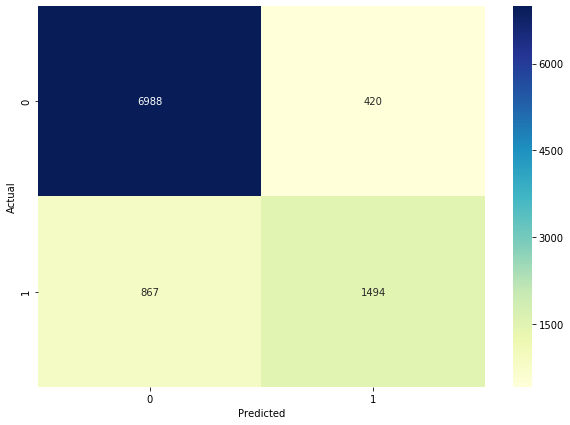

In [40]:
plt.figure(figsize = (10,7))
sns.heatmap(cnf_matrix_abc_best, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [41]:
#Classification Report
print(classification_report(y_test, y_pred_abc_best))
confusion_matrix(y_test, y_pred_abc_best)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7408
           1       0.78      0.63      0.70      2361

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.86      0.87      0.86      9769



array([[6988,  420],
       [ 867, 1494]])

### d) Calculate the AUC score



In [42]:
y_pred_proba_abc_best = model.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
abc_best_roc_auc = roc_auc_score(y_test, y_pred_proba_abc_best)

# Print roc_auc_score
print('ROC AUC score ABC_BEST: {:.2f}'.format(abc_best_roc_auc))

ROC AUC score ABC_BEST: 0.93


### e) Identify the top 5 features. Feel free to print a list OR to make a plot.



In [45]:
#Feature importance sorted descending order
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), model.feature_importances_[:5]), X_encoded.columns), 
             reverse=True))
top_features = sorted(zip(map(lambda x: round(x, 4), model.feature_importances_[:5]), X_encoded.columns), 
             reverse=True)

Features sorted by their score:
[(0.3575, 'capital-gain'), (0.2875, 'capital-loss'), (0.08, 'age'), (0.055, 'hours-per-week'), (0.02, 'education-num')]


In [46]:
top_features

[(0.3575, 'capital-gain'),
 (0.2875, 'capital-loss'),
 (0.08, 'age'),
 (0.055, 'hours-per-week'),
 (0.02, 'education-num')]

In [59]:
import numpy as np
values, labels = zip(*top_features)
labels


('hours-per-week', 'education-num', 'capital-loss', 'capital-gain', 'age')

In [67]:
#check first item in top features 
top_features[0]

(0.055, 'hours-per-week')

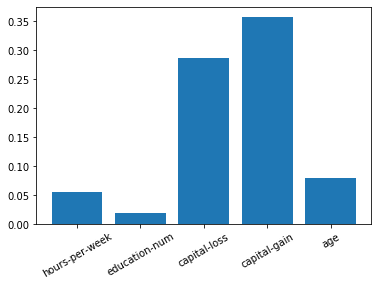

In [71]:
top5 = top_features

plt.bar(range(len(top5)), [val[0] for val in top5], align='center')
plt.xticks(range(len(top5)), [val[1] for val in top5])
plt.xticks(rotation=30)
plt.show()

### f) Using the model from part (b), predict for the train data. Look at the classification report for the train data - is there overfitting for the best estimator?

In [72]:
#Predict the response for test dataset
y_pred_abc_best_train = model.predict(X_train)
y_pred_proba_abc_best_test = model.predict_proba(X_train)[:,1]

In [73]:
#Classification Report
print(classification_report(y_train, y_pred_abc_best_train))
confusion_matrix (y_train, y_pred_abc_best_train)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     17312
           1       0.78      0.65      0.71      5480

    accuracy                           0.87     22792
   macro avg       0.84      0.80      0.81     22792
weighted avg       0.87      0.87      0.87     22792



array([[16301,  1011],
       [ 1895,  3585]])

## 4. Gradient Boosting Classifier - GridSearch:

### a) Use GradientBoostingClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following hyperparameters:

* n_estimators: 100,200, 300 & 400
* learning_rate: choose 3 learning rates of your choice
* max_depth: 1, 2 (you can try deeper, but remember part of the value of boosting stems from minimal complexity of trees)

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and for scoring use "roc_auc" (this is the score that will be referenced when identifying the best parameters).

Expect run time of 5-10 mins



In [74]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


# Setting up parameter grid
hyperparams = {'n_estimators': [100, 200, 300, 400], 'learning_rate': [0.2,0.4,0.6], 'max_depth': [1,2,3]}

# create Gradient Boosting Classifer
gbc_obj=GradientBoostingClassifier()

# Create gridsearch object with various combinations of parameters
gbc_Grid = GridSearchCV(gbc_obj, hyperparams, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)

# Fitting model and return results
gbc_Grid.fit(X_train, y_train)
print(gbc_Grid.best_score_)
print(gbc_Grid.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  4.3min finished


0.9270983559047906
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### b) Use the best estimator from GridSearchCV to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [75]:
gbc_grid_best = gbc_Grid.best_estimator_

# Train Gradient Boosting Classifer
model_gbc = gbc_grid_best.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_gbc_best = model_gbc.predict(X_test)
y_pred_proba_gbc_best = model_gbc.predict_proba(X_test)[:,1]

### c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).


In [76]:
#predict values on test data.  Print the confusion matrix
y_pred_gbc_best = model_gbc.predict(X_test)
cnf_matrix_gbc_best = confusion_matrix (y_test, y_pred_gbc_best)
print(cnf_matrix_gbc_best)

[[6990  418]
 [ 833 1528]]


Text(69.0, 0.5, 'Actual')

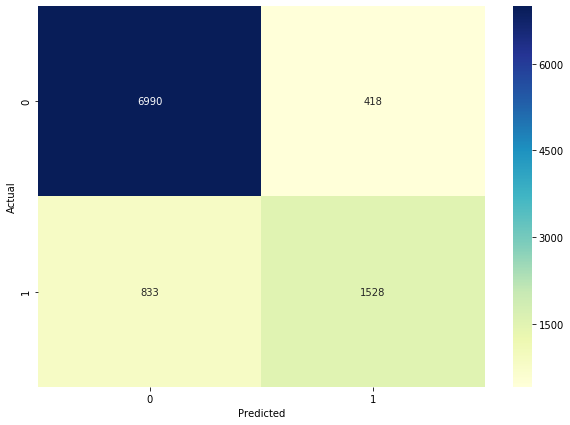

In [77]:
plt.figure(figsize = (10,7))
sns.heatmap(cnf_matrix_gbc_best, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [78]:
#Classification Report
print(classification_report(y_test, y_pred_gbc_best))
confusion_matrix (y_test, y_pred_gbc_best)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7408
           1       0.79      0.65      0.71      2361

    accuracy                           0.87      9769
   macro avg       0.84      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769



array([[6990,  418],
       [ 833, 1528]])


### d) Calculate the AUC score




In [79]:
y_pred_proba_gbc_best = model_gbc.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
gbc_best_roc_auc = roc_auc_score(y_test, y_pred_proba_gbc_best)

# Print roc_auc_score
print('ROC AUC score GBC_BEST: {:.2f}'.format(gbc_best_roc_auc))

ROC AUC score GBC_BEST: 0.93


### e) Identify the top 5 features. Feel free to print a list OR to make a plot.



In [80]:
#Feature importance sorted descending order
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), model.feature_importances_[:5]), X_encoded.columns), 
             reverse=True))

Features sorted by their score:
[(0.3575, 'capital-gain'), (0.2875, 'capital-loss'), (0.08, 'age'), (0.055, 'hours-per-week'), (0.02, 'education-num')]


### f) Using the model from part (b), predict for the train data. Look at the classification report for the train data - is there overfitting for the best estimator?

In [81]:
#predict values on test data.  Print the confusion matrix
y_pred_gbc_best_train = model.predict(X_train)
cnf_matrix_gbc_best_train = confusion_matrix (y_train, y_pred_gbc_best_train)
print(cnf_matrix_gbc_best_train)

[[16301  1011]
 [ 1895  3585]]


Text(69.0, 0.5, 'Actual')

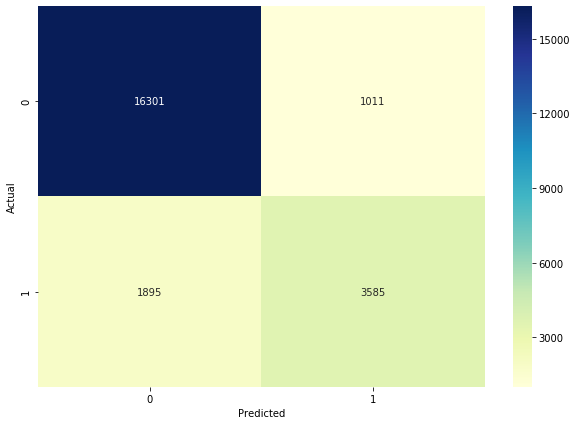

In [82]:
plt.figure(figsize = (10,7))
sns.heatmap(cnf_matrix_gbc_best_train, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [83]:
#Classification Report
print(classification_report(y_train, y_pred_gbc_best_train))
confusion_matrix (y_train, y_pred_gbc_best_train)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     17312
           1       0.78      0.65      0.71      5480

    accuracy                           0.87     22792
   macro avg       0.84      0.80      0.81     22792
weighted avg       0.87      0.87      0.87     22792



array([[16301,  1011],
       [ 1895,  3585]])

No, there does not appear to be overfitting in the best estimator for this model.  I determined this based on comparing the train accuracy vs the test accuracy.  The model performs well on both datasets.

## 5. XGBoost - RandomizedSearchCV

### Repeat 4(a) - 4(f) with xgboost and RandomizedSearchCV.

### For 4a use the following parameters: 

n_estimators: 100-1000 in increments of 50  (i.e. 100,150,200,.....1000)
learning_rate: 0.1 - 1.6 in increments of 0.1
max_depth: 1, 2
gamma: 0 - 5 in increments of 0.25
Note: For parameters with increments please don't feel the need to type each value by hand. There are better ways to handle this. Post in discussion thread if you are struggling.

For RandomizedSearchCV make sure to still use cv = 5 and for scoring use "roc_auc".

Note that you will have to install xgboost using "pip install xgboost". This can be done in your jupyter notebook with the following command: 

* !pip install xgboost

In [84]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setting up parameter grid
#using an arbitrary learning rate for now may comeback to this later
hyperparams = {'n_estimators': [100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000],
               'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6],
               'max_depth': [1,2],
                'gamma':[0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00]}

# create Gradient Boosting Classifer
xgb_obj= XGBClassifier()

# Create gridsearch object with various combinations of parameters
xgb_RS = RandomizedSearchCV(xgb_obj, hyperparams, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)

# Fitting model and return results
xgb_RS.fit(X_train, y_train)
print(xgb_RS.best_score_)
print(xgb_RS.best_estimator_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:  7.0min remaining:   36.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.2min finished


0.9257114264713762
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1.0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=350, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


### b) Use the best estimator from GridSearchCV to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [85]:
xgb_best = xgb_RS.best_estimator_

# Train XGB Classifer
model = xgb_best.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_xgb_best = model.predict(X_test)
y_pred_proba_xgb_best = model.predict_proba(X_test)[:,1]


### c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).

In [86]:
#predict values on test data.  Print the confusion matrix
y_pred_xgb_best = model.predict(X_test)
cnf_matrix_xgb_best = confusion_matrix (y_test, y_pred_xgb_best)
print(cnf_matrix_xgb_best)

[[6998  410]
 [ 869 1492]]


Text(69.0, 0.5, 'Actual')

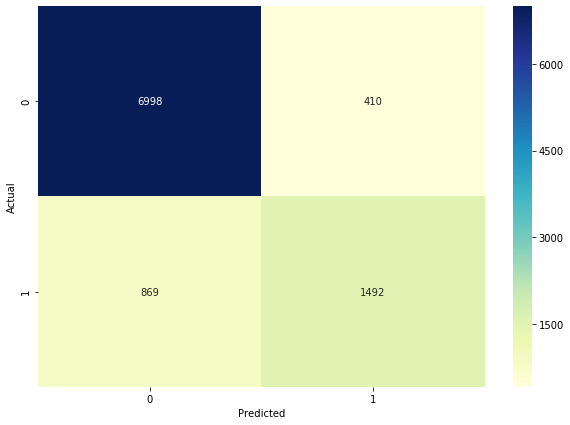

In [87]:
plt.figure(figsize = (10,7))
sns.heatmap(cnf_matrix_xgb_best, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [88]:
#Classification Report
print(classification_report(y_test, y_pred_xgb_best))
confusion_matrix (y_test, y_pred_xgb_best)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7408
           1       0.78      0.63      0.70      2361

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.86      0.87      0.86      9769



array([[6998,  410],
       [ 869, 1492]])

### d) Calculate the AUC score

In [89]:
y_pred_proba_xgb_best = model.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
xgb_best_roc_auc = roc_auc_score(y_test, y_pred_proba_xgb_best)

# Print roc_auc_score
print('ROC AUC score XGB_BEST: {:.2f}'.format(xgb_best_roc_auc))

ROC AUC score XGB_BEST: 0.93


### e) Identify the top 5 features. Feel free to print a list OR to make a plot.

In [90]:
#Feature importance sorted descending order
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), model.feature_importances_[:5]), X_encoded.columns), 
             reverse=True))

Features sorted by their score:
[(0.0979, 'education-num'), (0.0402, 'capital-gain'), (0.0308, 'age'), (0.0218, 'hours-per-week'), (0.0191, 'capital-loss')]


### f) Using the model from part (b), predict for the train data. Look at the classification report for the train data - is there overfitting for the best estimator?

In [91]:
#Predict the response for train dataset
y_pred_xgb_best_train = model.predict(X_train)
y_pred_proba_xgb_best_train = model.predict_proba(X_train)[:,1]

In [92]:
#Classification Report
print(classification_report(y_train, y_pred_xgb_best_train))
confusion_matrix (y_train, y_pred_xgb_best_train)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     17312
           1       0.79      0.65      0.72      5480

    accuracy                           0.88     22792
   macro avg       0.84      0.80      0.82     22792
weighted avg       0.87      0.88      0.87     22792



array([[16380,   932],
       [ 1905,  3575]])

* Test set accuracy: 0.87
* Train set accuracy: 0.88

Based on the classification report, there does not appear to be signs of overfitting in the model.  The model performs well on both the train set and the test set.

## 6. Moving into Conceptual Problems:

### a) What does the alpha parameter represent in AdaBoost? Please refer to chapter 7 of the Hands-On ML book if you are struggling.



AdaBoost classifier is another ensemble classifier.  Ensemble classifiers consist of multiple classifier algorithms. For example, assume a decision tree classifier has been trained and used to make predictions on the training set.  The relative weight of incorrectly classified training instances would be increased.  Another classifier is then trained on the training data using the updated weights and again predictions are made and weights are updated. This process is repeateed over and over.  The goal is to combine multiple "weak-classifiers" into a "strong-classifier".  The weights refers to the alpha-parameter.

### b) In AdaBoost explain how the final predicted class is determined. Be sure to reference the alpha term in your explanation.



AdaBoost cpmutes the . predictions of all the predictors and weights them using the predictor weights, alpha.The predicted class is the one that receives the majority of the weighted votes.

### c) In Gradient Boosting, what is the role of the max_depth parameter? Why is it important to tune on this parameter?



Max depth refers to the maximum depth of the tree.  It is a method for controlling overfitting.  A tree that does not have a max depth parameter is prone to lead to overfitting.  This is because the tree is making decisions and learning the noise of the training set.  When new data is introduced to the model, an overfit model does not perform well because it has learned to much noise from the training set.

### d) In Part (e) of Steps 2-5 you determined the top 5 predictors across each model. Do any predictors show up in the top 5 predictors for all three models? If so, comment on if this predictor makes sense given what you are attempting to predict. (Note: If you don't have any predictors showing up across all 3 predictors, explain one that shows up in 2 of them).



<b> RandomForest: </b> 
Features sorted by their score:
(0.2155, 'age'), (0.1248, 'capital-gain'), (0.1095, 'hours-per-week'), (0.0578, 'education-num'), (0.0385, 'capital-loss')

<b> AdaBoost </b> 
Features sorted by their score:
(0.345, 'capital-loss'), (0.315, 'capital-gain'), (0.0925, 'age'), (0.0325, 'hours-per-week'), (0.0125, 'education-num')

<b> GradientBoosting </b> 
Features sorted by their score:
(0.2269, 'capital-gain'), (0.166, 'education-num'), (0.0702, 'capital-loss'), (0.0602, 'age'), (0.0382, 'hours-per-week')

<b> XGB Boosting </b> 
Features sorted by their score:
(0.0906, 'education-num'), (0.0499, 'capital-gain'), (0.0307, 'hours-per-week'), (0.0274, 'capital-loss'), (0.0251, 'age')


All of these predictors make sense considering what we are trying to predict.  We are trying to predict whether or not someone makes more than 50K or less than 50K.  The underlying assumption is that all of these values are common among people who make over 50K.  Age, Hours per week, and the amount of education all have a significant impact on determining compensation.







### e) From the models run in steps 2-5, which performs the best based on the Classification Report? Support your reasoning with evidence from your test data and be sure to share the optimal hyperparameters found from your grid search.



GradientBoosting with GridSearchCV performed the best for me.  The test set . accuracy was 0.87 (AUC = 0.93) and train set accuracy of 0.88.  The optimal hyperparameters were:
* GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
* The key parameters that I set were n_estimators = 400, learning_rate = 0.2, max_depth = 2

### f) For your best performing model, plot out a ROC curve using your test data. Feel free to use sklearn, matplotlib or any other method in python. Describe what the x-axis & y-axis of the ROC curve tell us about a classifier.

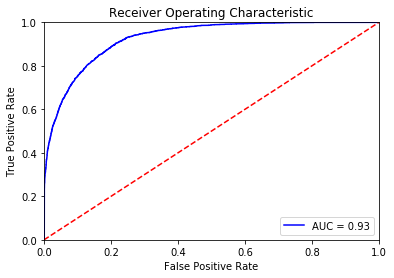

In [93]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_gbc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

As you can see in the ROC curve plot, the x-axis is the false positive rate and the y-axis is the true positive rate.  The false positive rate is the ratio of negative instances that are incorrectly classified as positive.  The True Positive Rate is the ratio of true positives that are correctly classified by the model.